In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import os
import sys
import warnings
import pandas 
import numpy
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline


In [5]:
sp_tracks = pd.read_csv('E:\DAP-L projects/tracks.csv')
sp_feature = pd.read_csv('E:\DAP-L projects/SpotifyFeatures.csv')
data = pd.read_csv("E:\daplab/data.csv")


In [3]:
#viewing the tracks data
sp_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],22-02-1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],01-06-1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],21-03-1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],21-03-1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [6]:
#viewing the feature data
sp_feature.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
#checking null in tracks data
pd.isnull(sp_tracks).sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [7]:
#checking null in feature data
pd.isnull(sp_feature).sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [8]:
#checking info in tracks data
sp_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198465 entries, 0 to 198464
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                198465 non-null  object 
 1   name              198465 non-null  object 
 2   popularity        198465 non-null  int64  
 3   duration_ms       198465 non-null  int64  
 4   explicit          198465 non-null  int64  
 5   artists           198465 non-null  object 
 6   id_artists        198465 non-null  object 
 7   release_date      198465 non-null  object 
 8   danceability      198465 non-null  float64
 9   energy            198465 non-null  float64
 10  key               198465 non-null  int64  
 11  loudness          198465 non-null  float64
 12  mode              198465 non-null  int64  
 13  speechiness       198465 non-null  float64
 14  acousticness      198465 non-null  float64
 15  instrumentalness  198465 non-null  float64
 16  liveness          19

In [9]:
#checking info in feature data
sp_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [10]:
a=sp_tracks.sort_values('popularity',ascending=True)[0:10]
a[['name','popularity']]

,name,popularity
198464,Sexy T-Shirt - My Philosophy,0
136113,Livery stable blues,0
136112,This Is Always,0
136111,When the Moon Comes Over the Mountain,0
136110,My Devotion,0
136109,Nobody's chasing me,0
136108,That Ain't the Way I Dreamed It,0
136115,Miss You,0
136107,Jim,0
136104,Mood Indigo,0


In [11]:
#descriptive statistics of tracks
sp_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,198465.0,28.301313,21.768289,0.0,6.0000,29.000000,44.0000,100.000
duration_ms,198465.0,230537.443615,134856.509012,3344.0,170733.0000,209040.000000,263573.0000,5042185.000
explicit,198465.0,0.040188,0.196401,0.0,0.0000,0.000000,0.0000,1.000
danceability,198465.0,0.551784,0.170818,0.0,0.4360,0.565000,0.6790,0.988
energy,198465.0,0.508633,0.262976,0.0,0.2900,0.504000,0.7250,1.000
key,198465.0,5.206031,3.514566,0.0,2.0000,5.000000,8.0000,11.000
loudness,198465.0,-10.958102,5.380290,-60.0,-13.8820,-10.056000,-6.9480,4.584
mode,198465.0,0.682025,0.465691,0.0,0.0000,1.000000,1.0000,1.000
speechiness,198465.0,0.101318,0.176658,0.0,0.0347,0.044700,0.0737,0.970
acousticness,198465.0,0.490438,0.368775,0.0,0.1010,0.498000,0.8640,0.996


In [13]:
#descriptive of feature
sp_feature.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [14]:
a=sp_tracks
b=a[a['popularity']>90].sort_values('popularity',ascending=False)[:10]
b[['name','popularity','artists']]

,name,popularity,artists
93802,Peaches (feat. Daniel Caesar & Giveon),100,"['Justin Bieber', 'Daniel Caesar', 'Giveon']"
93803,drivers license,99,['Olivia Rodrigo']
93804,Astronaut In The Ocean,98,['Masked Wolf']
92810,Save Your Tears,97,['The Weeknd']
92811,telepatía,97,['Kali Uchis']
92813,Blinding Lights,96,['The Weeknd']
93805,Leave The Door Open,96,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']"
92814,The Business,95,['Tiësto']
91866,Streets,94,['Doja Cat']
92816,Heartbreak Anniversary,94,['Giveon']


In [15]:
sp_tracks[['artists']].iloc[18]

artists    ['Victor Boucher']
Name: 18, dtype: object

In [16]:
sample_sp=sp_tracks.sample(int(0.004*len(sp_tracks)))
print(len(sample_sp))

793


[Text(0.5, 1.0, 'Regression Plot - Loudness vs Energy Correlation')]

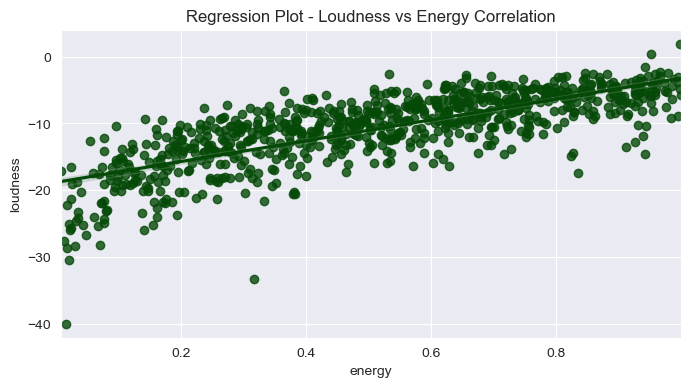

In [78]:
plt.figure(figsize=(8,4))
sns.regplot(data=sample_sp, y='loudness', x='energy', color='#054907').set(title='Regression Plot - Loudness vs Energy Correlation')

[Text(0.5, 1.0, 'Regression Plot - Popularity vs Acousticness Correlation')]

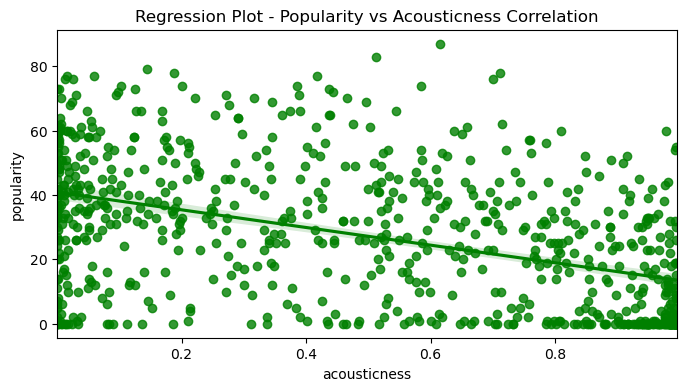

In [17]:
plt.figure(figsize=(8,4))
sns.regplot(data=sample_sp, y='popularity', x='acousticness', color='#008000').set(title='Regression Plot - Popularity vs Acousticness Correlation')

In [18]:
sp_tracks['duration'] = sp_tracks['duration_ms'].apply (lambda x : round(x/1000))
sp_tracks.drop('duration_ms', inplace = True, axis=1)
sp_tracks.duration.head()

0    127
1     98
2    182
3    177
4    163
Name: duration, dtype: int64

Text(0, 0.5, 'Genres')

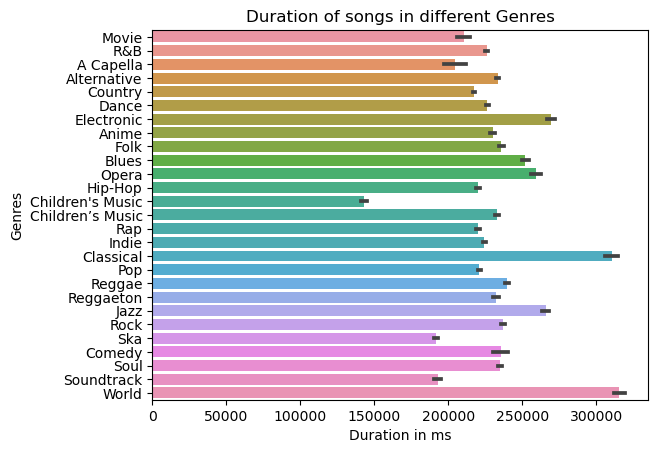

In [19]:
#Plot Duration of the Songs w.r.t. different Genres using a horizontal barplot.
plt.title('Duration of songs in different Genres')
sns.color_palette('crest', as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=sp_feature)
plt.xlabel('Duration in ms')
plt.ylabel('Genres')

[Text(0.5, 1.0, 'Genres by Popularity-Top 5')]

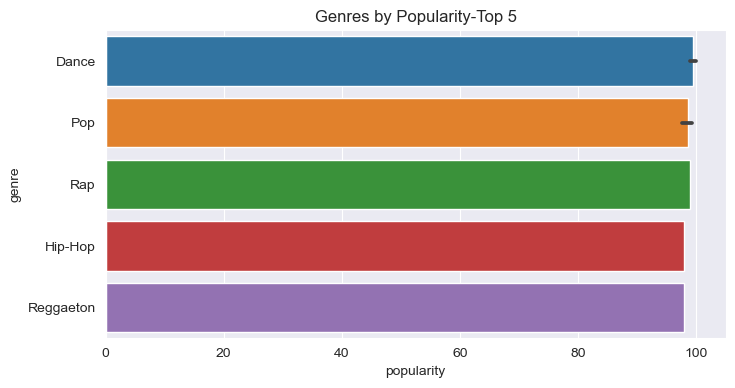

In [82]:
#Find top five genres by Popularity and pot a barplot for the same.
sns.set_style(style='darkgrid')
plt.figure(figsize=(8,4))
Top = sp_feature.sort_values('popularity', ascending=False)[:10]
sns.barplot(y = 'genre', x = 'popularity', data = Top).set(title='Genres by Popularity-Top 5')

In [20]:

#RECOMMENDATION SYSTEM
df = pd.read_csv("E:/recsong/spotify_millsongdata.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [22]:

df.columns

Index(['artist', 'song', 'link', 'text'], dtype='object')

In [23]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [24]:
df.drop("link", axis=1, inplace = True)

In [25]:
df.head()

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


In [26]:
df.tail()

,artist,song,text
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,come in \r\nmake yourself at home \r\ni'm a ...


In [27]:
df = df[0:20000]
df.drop_duplicates(subset="song", inplace=True)
df.reset_index(drop = True, inplace = True)

In [28]:
#Renaming columns
df.rename(columns = {"artist":'Artist','song':'Song','text':'Lyrics'},inplace = True)

In [29]:
df.columns

Index(['Artist', 'Song', 'Lyrics'], dtype='object')

In [30]:
df.isnull().sum()

Artist    0
Song      0
Lyrics    0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
df['Combined_features'] = df['Artist']+" "+df['Song']+" "+df['Lyrics']

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [34]:
tfv = TfidfVectorizer(max_features = 20000)

In [35]:
tfv_matrix = tfv.fit_transform(df["Combined_features"])

In [36]:
cosine_sim = cosine_similarity(tfv_matrix)

In [37]:
song_user_likes = "Hope"
song_index = df[df.Song == song_user_likes].index[0]

In [38]:
song_index

659

In [42]:
similar_songs = list(enumerate(cosine_sim[song_index]))


In [43]:
similar_song_sorted = sorted(similar_songs,key = lambda x:x[1],reverse = True)

In [44]:
#Recommender System Creation
def recommended_songs(song_user_likes):
    song_index = df[df.Song == song_user_likes].index[0]
    similar_songs = list(enumerate(cosine_sim[song_index]))
    similar_song_sorted = sorted(similar_songs, key=lambda x:x[1], reverse=True)
    
    for song in similar_song_sorted[1:11]:
        similar_songs = df[df.index == song[0]]["Song"].values[0]
        print(similar_songs)

In [45]:
recommended_songs("Shake It About")

Shake Me
Shake Your Kitty
Shake
Hey Ya
I Want The World To Know
Shake Senora
Get On The Floor
Rattlesnake Shake
Shake A Little
Troubleshooter


In [46]:
recommended_songs("Cool")

Boy Boy (I'm The Boy)
Hot Boy
Only A Boy
Silly Boy
The House Is Rockin'
Bad Boy
Selfish Girl
Boy
Dear Boy
Boy Like You


In [47]:
recommended_songs("Bang")

Sea Of Dreams
Bang-A-Boomerang
The Prime Of Your Love
Dum Dum
Bloody Mary
Endless Love
Boomerang
Disturbia
Boom Boom Boom
Boom, Boom, Ain't It Great To Be Crazy?


<Axes: xlabel='popularity'>

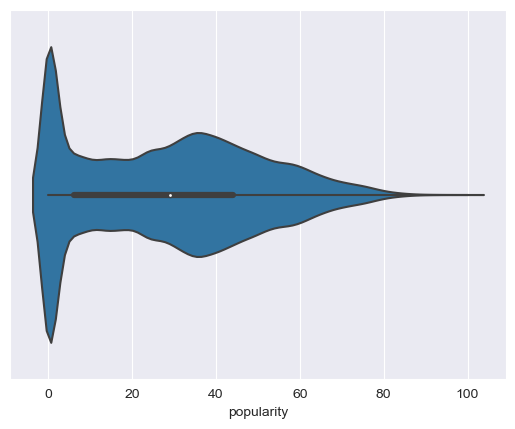

In [95]:
sns.violinplot(x=sp_tracks["popularity"])

<Axes: xlabel='popularity', ylabel='year'>

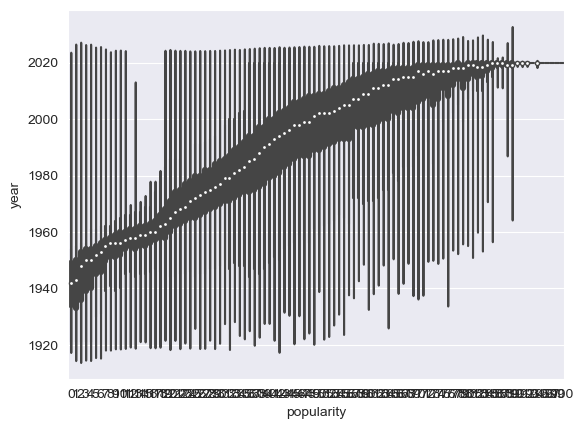

In [96]:
sns.violinplot(data=data, x="popularity", y="year")

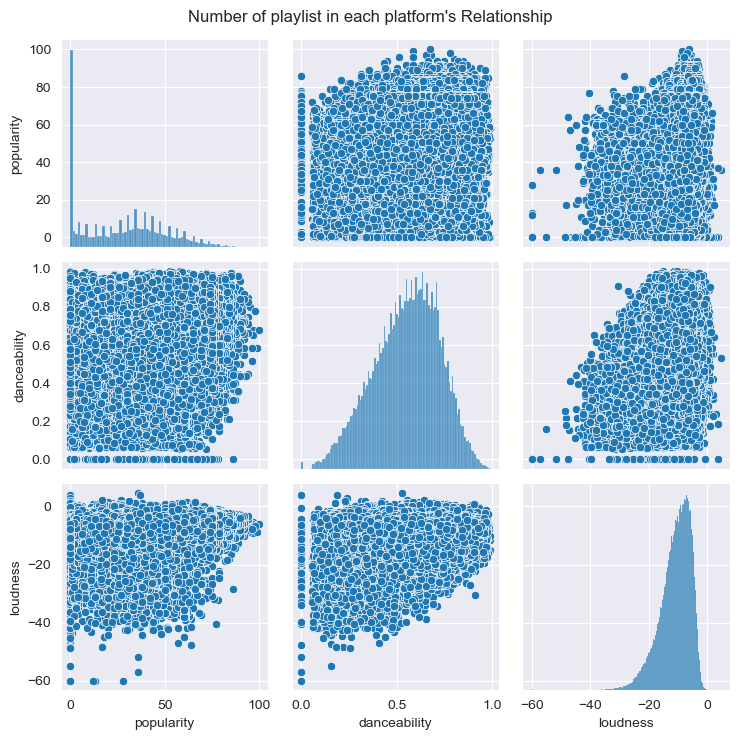

In [98]:
cols = ['popularity','danceability', 'loudness']
sns.pairplot(sp_tracks[cols])
plt.suptitle("Number of playlist in each platform's Relationship")
plt.tight_layout()
plt.show() 

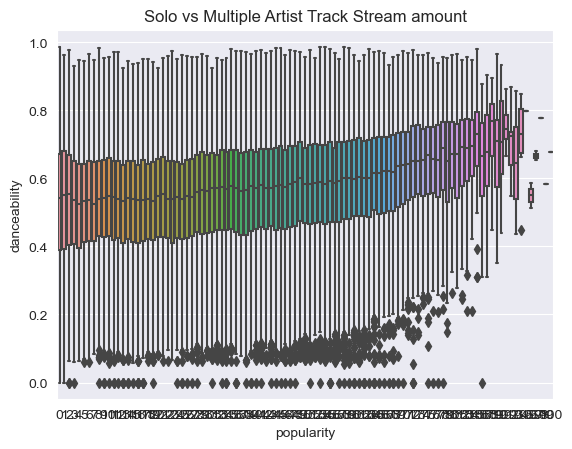

In [100]:
sns.boxplot(data=sp_tracks,x='popularity',y='danceability')
plt.title("Solo vs Multiple Artist Track Stream amount")
plt.show()

In [101]:
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [102]:
selected_columns = [
    'name',
    'popularity',
    'duration',
    'explicit',
    'artists',
    'release_date',
    # audio features of the track
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

In [103]:
len(selected_columns)


15

In [104]:
tracks_df = sp_tracks[selected_columns].copy()


In [105]:
tracks_df

,name,popularity,duration,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Carve,6,127,0,['Uli'],22-02-1922,0.645,0.4450,-13.338,0.4510,0.674,0.744000,0.1510,0.127,104.851
1,Capítulo 2.16 - Banquero Anarquista,0,98,0,['Fernando Pessoa'],01-06-1922,0.695,0.2630,-22.136,0.9570,0.797,0.000000,0.1480,0.655,102.009
2,Vivo para Quererte - Remasterizado,0,182,0,['Ignacio Corsini'],21-03-1922,0.434,0.1770,-21.180,0.0512,0.994,0.021800,0.2120,0.457,130.418
3,El Prisionero - Remasterizado,0,177,0,['Ignacio Corsini'],21-03-1922,0.321,0.0946,-27.961,0.0504,0.995,0.918000,0.1040,0.397,169.980
4,Lady of the Evening,0,163,0,['Dick Haymes'],1922,0.402,0.1580,-16.900,0.0390,0.989,0.130000,0.3110,0.196,103.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198460,A Desperate Trail,0,113,0,['Benjamin Schoos'],06-10-2003,0.791,0.4780,-8.214,0.0330,0.519,0.000046,0.0921,0.773,128.063
198461,My Bluesy Kopje Koffie,0,86,0,['Benjamin Schoos'],06-10-2003,0.509,0.2650,-14.108,0.0728,0.798,0.865000,0.1110,0.408,82.592
198462,A Million Voices,0,146,0,['Benjamin Schoos'],06-10-2003,0.341,0.2760,-10.756,0.0337,0.483,0.175000,0.1520,0.217,118.086
198463,Mister Mango's Last Trip to Europe,0,93,0,['Benjamin Schoos'],06-10-2003,0.577,0.4140,-5.943,0.0393,0.674,0.000009,0.4010,0.213,86.685


In [107]:
tracks_df.explicit.value_counts()


explicit
0    190489
1      7976
Name: count, dtype: int64

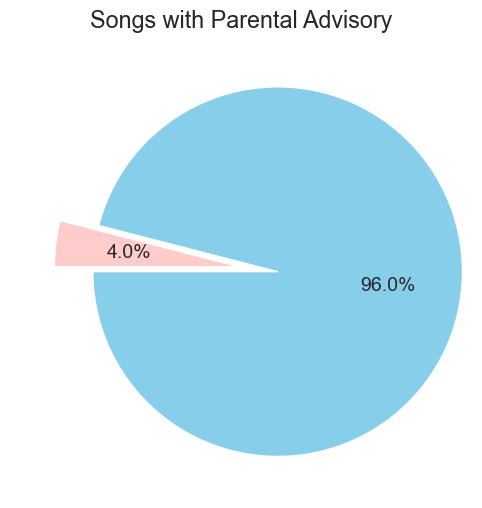

In [108]:
plt.title('Songs with Parental Advisory')
plt.pie(tracks_df.explicit.value_counts(), 
        explode=(0.2, 0.01), 
        colors=['skyblue','#ffcccc'], 
        autopct='%1.1f%%', 
        startangle=180);

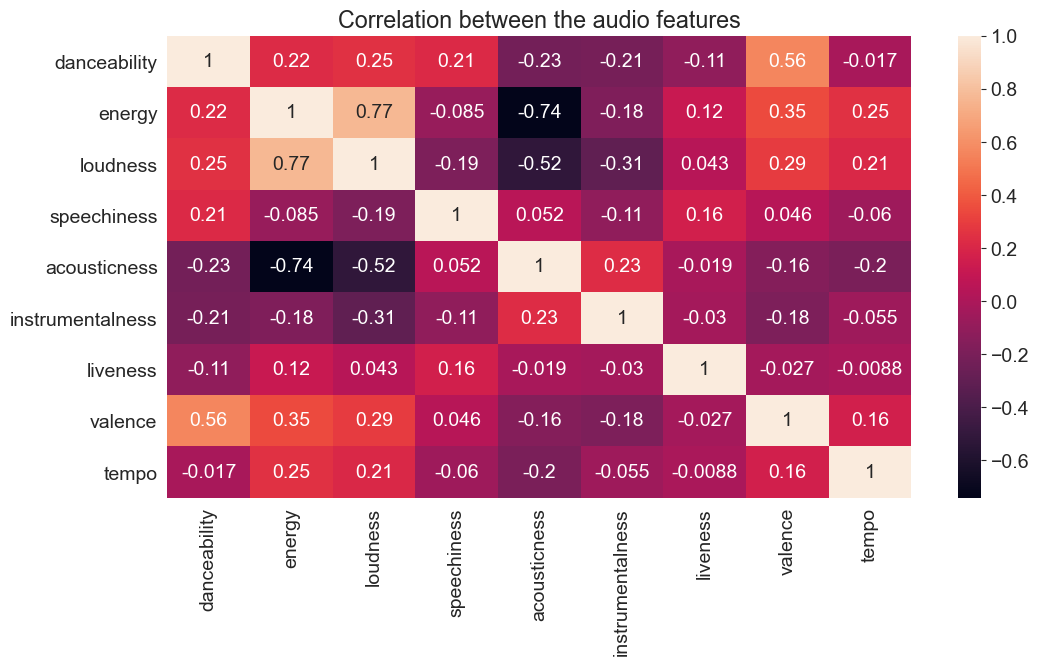

In [109]:
corr = tracks_df[['danceability', 
                  'energy', 
                  'loudness', 
                  'speechiness', 
                  'acousticness', 
                  'instrumentalness', 
                  'liveness',
                  'valence', 
                  'tempo' ]].corr()

plt.title('Correlation between the audio features')
sns.heatmap(corr, annot=True);

In [110]:
most_danceable_tracks = tracks_df.sort_values('danceability', ascending=False).head(5)
most_danceable_tracks

,name,popularity,duration,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
62569,Funky Cold Medina,58,248,0,['Tone-Loc'],01-01-1989,0.988,0.633,-15.012,0.0888,0.07550,0.000002,0.0668,0.929,117.493
156664,Who Loves The Sun feat. Jo.Ke - Edit,53,257,0,"['Nu', 'Jo.Ke']",12-07-2011,0.988,0.644,-10.245,0.0720,0.11800,0.462000,0.2440,0.499,120.003
74928,New Year (2021),0,42,0,"['xxrichbeats', 'Egor4ik']",20-01-2021,0.987,0.293,-11.453,0.1990,0.00321,0.000010,0.1280,0.502,119.974
175899,Go Girl,54,230,1,"['Pitbull', 'Trina', 'Young Bo']",29-05-2012,0.986,0.597,-6.809,0.3080,0.14500,0.000002,0.1970,0.761,115.004
119216,Who Loves The Sun feat. Jo.Ke,59,562,0,"['Jo.Ke', 'Nu']",12-07-2011,0.985,0.686,-9.905,0.0510,0.18900,0.669000,0.1930,0.693,120.004


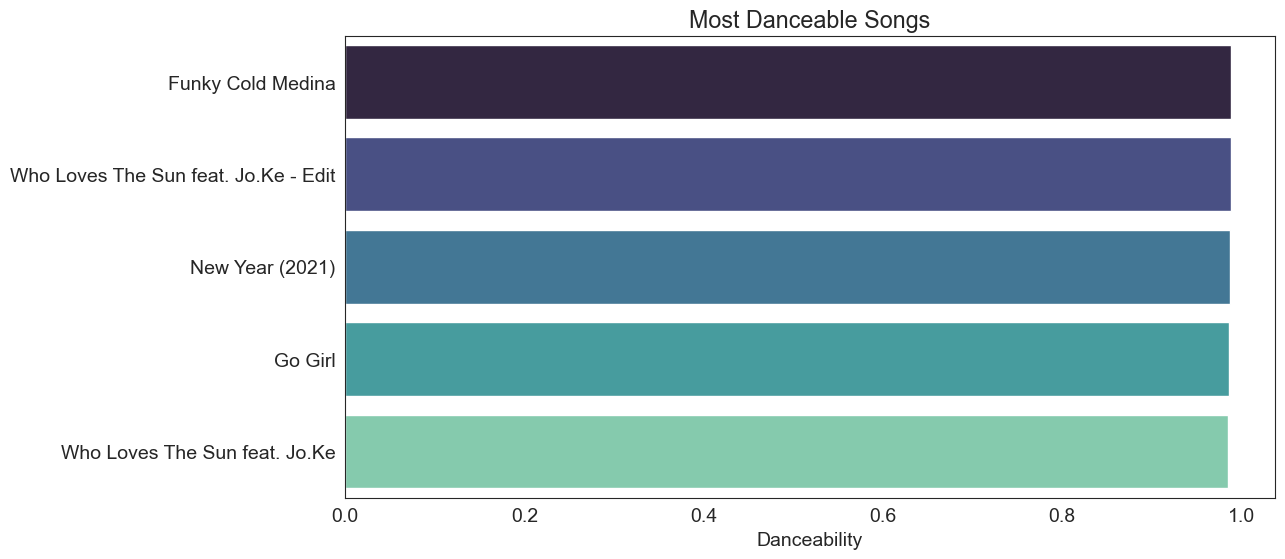

In [111]:
with sns.axes_style('white'):
    plt.title('Most Danceable Songs')
    sns.barplot(x='danceability', y='name', palette='mako', data=most_danceable_tracks)
    plt.xlabel('Danceability')
    plt.ylabel('');

In [112]:
popular_songs = tracks_df.sort_values('popularity', ascending=False).reset_index(drop=True).head(10)
popular_songs

,name,popularity,duration,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Peaches (feat. Daniel Caesar & Giveon),100,198,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",19-03-2021,0.677,0.696,-6.181,0.1190,0.32100,0.000000,0.4200,0.464,90.030
1,drivers license,99,242,1,['Olivia Rodrigo'],08-01-2021,0.585,0.436,-8.761,0.0601,0.72100,0.000013,0.1050,0.132,143.874
2,Astronaut In The Ocean,98,133,0,['Masked Wolf'],06-01-2021,0.778,0.695,-6.865,0.0913,0.17500,0.000000,0.1500,0.472,149.996
3,Save Your Tears,97,216,1,['The Weeknd'],20-03-2020,0.680,0.826,-5.487,0.0309,0.02120,0.000012,0.5430,0.644,118.051
4,telepatía,97,160,0,['Kali Uchis'],04-12-2020,0.653,0.524,-9.016,0.0502,0.11200,0.000000,0.2030,0.553,83.970
5,Blinding Lights,96,200,0,['The Weeknd'],20-03-2020,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005
6,Leave The Door Open,96,242,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",05-03-2021,0.586,0.616,-7.964,0.0324,0.18200,0.000000,0.0927,0.719,148.088
7,The Business,95,164,0,['Tiësto'],16-09-2020,0.798,0.620,-7.079,0.2320,0.41400,0.019200,0.1120,0.235,120.031
8,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,94,169,0,"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...",15-01-2021,0.824,0.862,-3.424,0.1260,0.00760,0.000132,0.3030,0.801,122.980
9,Fiel,94,262,0,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",04-02-2021,0.849,0.701,-4.407,0.0600,0.40700,0.000000,0.1120,0.505,98.005


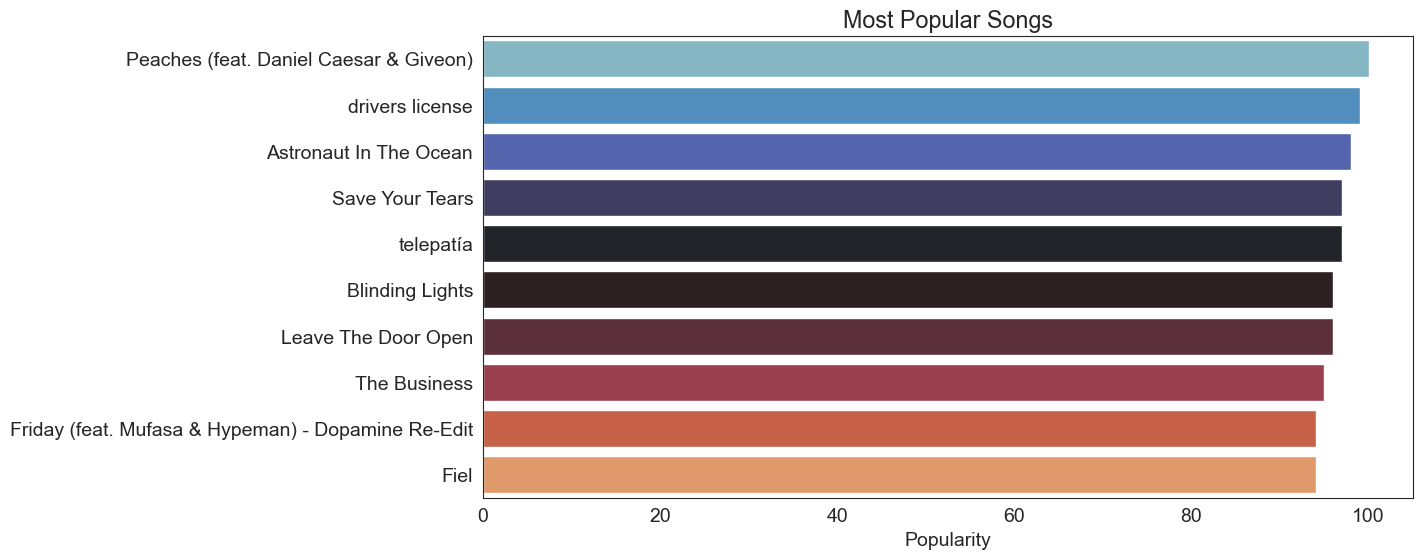

In [113]:
with sns.axes_style('white'):
    plt.title('Most Popular Songs')
    sns.barplot(x='popularity', y='name', palette='icefire', data=popular_songs)
    plt.xlabel('Popularity')
    plt.ylabel('');

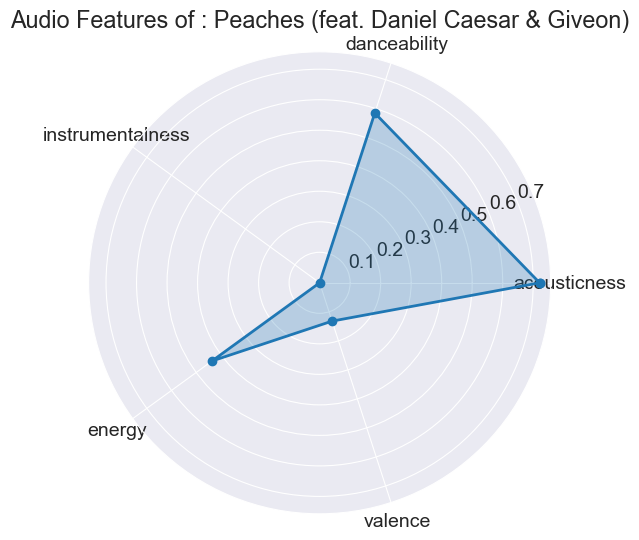

In [114]:
labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = popular_songs.loc[1,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.show()
ax = plt.subplot(111, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Audio Features of : ' + popular_songs.at[0,'name'])
ax.grid(True)